In [1]:
pip install fbprophet

Note: you may need to restart the kernel to use updated packages.


In [2]:
import time
import datetime
import matplotlib
# import mpld3
import json
import pprint as pp
import pandas as pd
import numpy as np
from fbprophet import Prophet
from decimal import Decimal

In [3]:
pip install quandl

Note: you may need to restart the kernel to use updated packages.


In [4]:
import quandl

In [5]:
#Quandl API Key
quandl.ApiConfig.api_key = "dXhz4roCdJd1NcxB_hzH"

In [6]:
#To Slice Time Frame
#quandl.get('CHRIS/MGEX_IH1', start_date='2019-04-30', end_date='2019-04-30')

In [7]:
#To Call Crude Light Front Month Contract
quandl.get('Chris/CME_HH1')

,Open,High,Low,Last,Change,Settle,Volume,Previous Day Open Interest
Date,,,,,,,,
2014-02-18,5.450,5.562,5.390,5.551,0.337,5.551,3513.0,37954.0
2014-02-19,5.705,6.258,5.705,6.149,0.598,6.149,6804.0,39706.0
2014-02-20,6.139,6.271,5.996,6.064,0.085,6.064,3387.0,39706.0
2014-02-21,6.207,6.207,5.881,6.135,0.071,6.135,5850.0,40264.0
2014-02-24,6.388,6.417,5.416,5.445,0.690,5.445,8648.0,39949.0
2014-02-25,5.031,5.075,4.785,5.096,0.349,5.096,8527.0,41805.0
2014-02-26,4.850,4.905,4.660,4.855,0.241,4.855,5298.0,43129.0
2014-02-27,4.509,4.550,4.450,4.511,0.030,4.511,400.0,43768.0
2014-02-28,4.490,4.644,4.479,4.609,0.098,4.609,1072.0,43408.0


In [8]:
#Create Data Frame
import pandas as pd
ng = quandl.get("Chris/CME_HH1")

In [9]:
ng.head()

,Open,High,Low,Last,Change,Settle,Volume,Previous Day Open Interest
Date,,,,,,,,
2014-02-18,5.450,5.562,5.390,5.551,0.337,5.551,3513.0,37954.0
2014-02-19,5.705,6.258,5.705,6.149,0.598,6.149,6804.0,39706.0
2014-02-20,6.139,6.271,5.996,6.064,0.085,6.064,3387.0,39706.0
2014-02-21,6.207,6.207,5.881,6.135,0.071,6.135,5850.0,40264.0
2014-02-24,6.388,6.417,5.416,5.445,0.690,5.445,8648.0,39949.0


In [10]:
ng.describe(include='all')

,Open,High,Low,Last,Change,Settle,Volume,Previous Day Open Interest
count,1311.000000,1315.000000,1315.000000,1315.000000,1308.000000,1315.000000,1315.000000,1315.000000
mean,3.048850,3.092449,3.003284,3.047496,0.062713,3.047869,3033.004563,32899.483650
std,0.688701,0.698352,0.675197,0.687093,0.068866,0.688280,2736.277529,8628.464712
min,1.621000,1.675000,1.613000,1.632000,0.001000,1.639000,5.000000,15967.000000
25%,2.687500,2.721000,2.655000,2.688000,0.023000,2.688500,1179.500000,26420.000000
50%,2.897000,2.935000,2.854000,2.895000,0.044500,2.894000,2234.000000,31493.000000
75%,3.246000,3.292000,3.187500,3.238000,0.079000,3.237000,3860.500000,38350.000000
max,6.388000,6.417000,5.996000,6.149000,0.799000,6.149000,19012.000000,63556.000000


In [11]:
ng.dtypes

Open                          float64
High                          float64
Low                           float64
Last                          float64
Change                        float64
Settle                        float64
Volume                        float64
Previous Day Open Interest    float64
dtype: object

In [12]:
#Export Quandl Data to CSV
ng.to_csv(r'/resources/labs/DP0701EN/NaturalGas.csv')

In [14]:
model = Prophet()

In [15]:
ng.index

DatetimeIndex(['2014-02-18', '2014-02-19', '2014-02-20', '2014-02-21',
               '2014-02-24', '2014-02-25', '2014-02-26', '2014-02-27',
               '2014-02-28', '2014-03-03',
               ...
               '2019-04-29', '2019-04-30', '2019-05-01', '2019-05-02',
               '2019-05-03', '2019-05-06', '2019-05-07', '2019-05-08',
               '2019-05-09', '2019-05-10'],
              dtype='datetime64[ns]', name='Date', length=1315, freq=None)

In [16]:
#Fix Date Column Issue
ng = ng.reset_index()
print(ng[['Open', 'Date']])

       Open       Date
0     5.450 2014-02-18
1     5.705 2014-02-19
2     6.139 2014-02-20
3     6.207 2014-02-21
4     6.388 2014-02-24
5     5.031 2014-02-25
6     4.850 2014-02-26
7     4.509 2014-02-27
8     4.490 2014-02-28
9     4.711 2014-03-03
10    4.504 2014-03-04
11    4.620 2014-03-05
12    4.535 2014-03-06
13    4.625 2014-03-07
14    4.700 2014-03-10
15    4.660 2014-03-11
16    4.564 2014-03-12
17    4.424 2014-03-13
18    4.377 2014-03-14
19    4.500 2014-03-17
20    4.516 2014-03-18
21    4.490 2014-03-19
22    4.469 2014-03-20
23    4.304 2014-03-21
24    4.305 2014-03-24
25    4.355 2014-03-25
26    4.395 2014-03-26
27    4.383 2014-03-27
28    4.528 2014-03-28
29    4.470 2014-03-31
...     ...        ...
1285  2.721 2019-03-29
1286  2.658 2019-04-01
1287  2.705 2019-04-02
1288  2.681 2019-04-03
1289  2.675 2019-04-04
1290  2.631 2019-04-05
1291  2.684 2019-04-08
1292  2.715 2019-04-09
1293  2.701 2019-04-10
1294  2.701 2019-04-11
1295  2.676 2019-04-12
1296  2.643

In [17]:
ng['Last'].values

array([5.551, 6.149, 6.064, ..., 2.603, 2.592, 2.622])

In [24]:
ng_df = pd.read_csv('NaturalGas.csv')

In [25]:
ng_df.head()

,Date,Open,High,Low,Last,Change,Settle,Volume,Previous Day Open Interest
0,2014-02-18,5.450,5.562,5.390,5.551,0.337,5.551,3513.0,37954.0
1,2014-02-19,5.705,6.258,5.705,6.149,0.598,6.149,6804.0,39706.0
2,2014-02-20,6.139,6.271,5.996,6.064,0.085,6.064,3387.0,39706.0
3,2014-02-21,6.207,6.207,5.881,6.135,0.071,6.135,5850.0,40264.0
4,2014-02-24,6.388,6.417,5.416,5.445,0.690,5.445,8648.0,39949.0


In [26]:
ng_df['y'] =  ng_df['Last']
ng_df['ds'] = ng_df['Date']

In [27]:
ng_df['y_orig'] = ng_df['y'] # save copy of original data
#log transform y
ng_df['y'] = np.log(ng_df['y'])

In [28]:
ng_df['y'] =  ng_df['Last']
ng_df['ds'] = ng_df['Date']

In [29]:
ng_df.head()

,Date,Open,High,Low,Last,Change,Settle,Volume,Previous Day Open Interest,y,ds,y_orig
0,2014-02-18,5.450,5.562,5.390,5.551,0.337,5.551,3513.0,37954.0,5.551,2014-02-18,5.551
1,2014-02-19,5.705,6.258,5.705,6.149,0.598,6.149,6804.0,39706.0,6.149,2014-02-19,6.149
2,2014-02-20,6.139,6.271,5.996,6.064,0.085,6.064,3387.0,39706.0,6.064,2014-02-20,6.064
3,2014-02-21,6.207,6.207,5.881,6.135,0.071,6.135,5850.0,40264.0,6.135,2014-02-21,6.135
4,2014-02-24,6.388,6.417,5.416,5.445,0.690,5.445,8648.0,39949.0,5.445,2014-02-24,5.445


In [30]:
model = Prophet()
model.fit(ng_df);

/home/jupyterlab/conda/lib/python3.6/site-packages/fbprophet/forecaster.py:880: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  min_dt = dt.iloc[dt.nonzero()[0]].min()
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [31]:
future_data = model.make_future_dataframe(periods=6)

In [32]:
forecast_data =model.predict(future_data)

In [33]:
forecast_data.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2014-02-18,5.257841,4.580688,5.222361,5.257841,5.257841,-0.351356,-0.351356,-0.351356,-0.051053,-0.051053,-0.051053,-0.300303,-0.300303,-0.300303,0.0,0.0,0.0,4.906484
1,2014-02-19,5.251153,4.602560,5.212649,5.251153,5.251153,-0.345311,-0.345311,-0.345311,-0.043634,-0.043634,-0.043634,-0.301677,-0.301677,-0.301677,0.0,0.0,0.0,4.905842
2,2014-02-20,5.244465,4.574933,5.206839,5.244465,5.244465,-0.352024,-0.352024,-0.352024,-0.049561,-0.049561,-0.049561,-0.302464,-0.302464,-0.302464,0.0,0.0,0.0,4.892440
3,2014-02-21,5.237777,4.554739,5.201673,5.237777,5.237777,-0.356467,-0.356467,-0.356467,-0.053654,-0.053654,-0.053654,-0.302813,-0.302813,-0.302813,0.0,0.0,0.0,4.881310
4,2014-02-24,5.217713,4.542707,5.186755,5.217713,5.217713,-0.365116,-0.365116,-0.365116,-0.062441,-0.062441,-0.062441,-0.302676,-0.302676,-0.302676,0.0,0.0,0.0,4.852597


In [34]:
	
forecast_data[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1316,2019-05-12,3.232299,2.931678,3.539128
1317,2019-05-13,3.046044,2.731224,3.341106
1318,2019-05-14,3.063137,2.747811,3.363155
1319,2019-05-15,3.075625,2.780663,3.383726
1320,2019-05-16,3.074160,2.754973,3.384176


/home/jupyterlab/conda/lib/python3.6/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


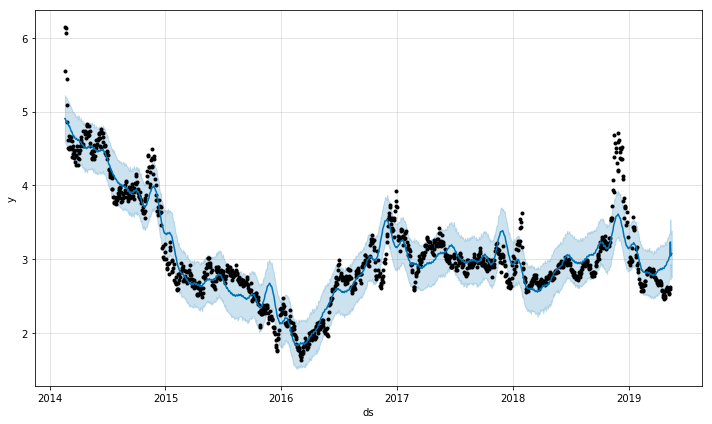

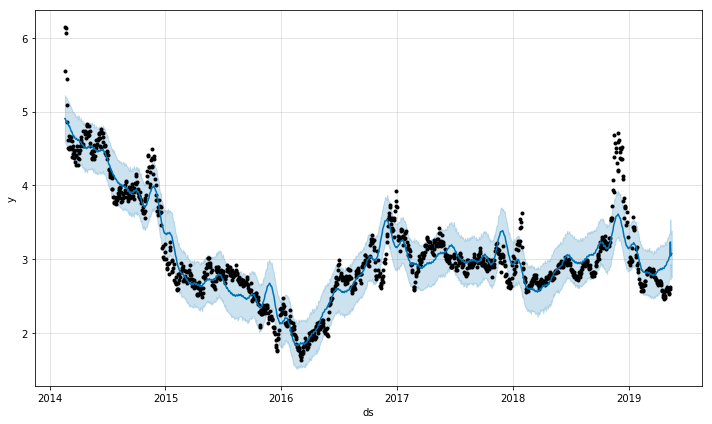

In [35]:
#Plot Data to Understand how well the model is working
model.plot(forecast_data)

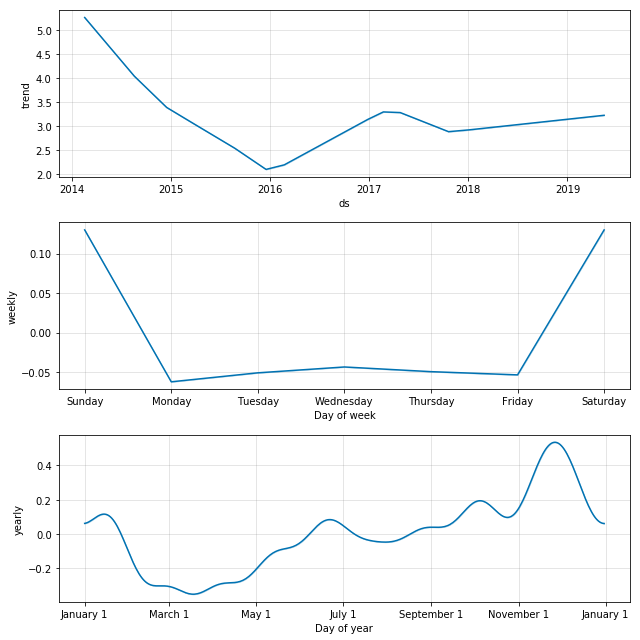

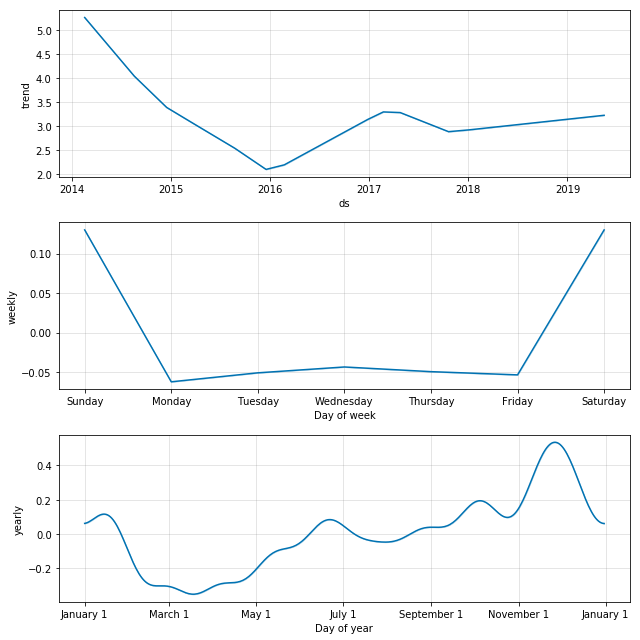

In [36]:
#Plot Seasonality and Trend components
model.plot_components(forecast_data)

In [37]:
# Lets Use original data to plot the model before tweaking the model
forecast_data_orig = forecast_data #save original forecast
forecast_data_orig['yhat'] = np.exp(forecast_data_orig['yhat'])
forecast_data_orig['yhat_lower'] = np.exp(forecast_data_orig['yhat_lower'])
forecast_data_orig['yhat_upper'] = np.exp(forecast_data_orig['yhat_upper'])

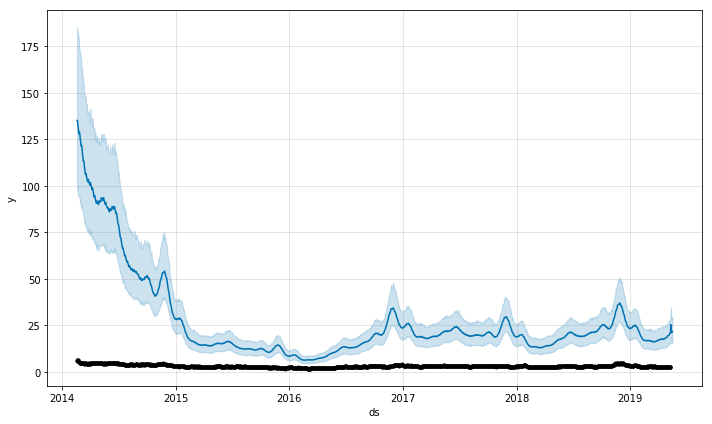

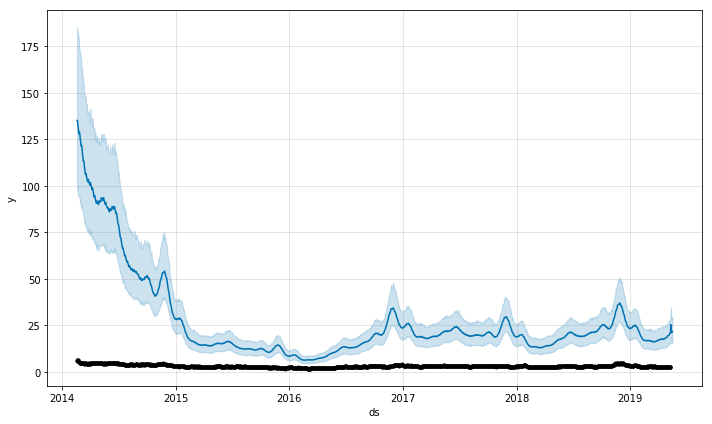

In [39]:
model.plot(forecast_data_orig)

In [50]:
#Graphs above seem odd. Maybe the original Log of the data did not compute????
#Oh okay tutorial is saying we need "original 'y' points plotted on this chart"
#Rename 'y_origin' column in the ng_df to 'y'
#Disclaimer: BE CAREFUL NOT TO CONTINUING ANALYZING DATA WITHT HE NON-LOG TRANSFORMED DATA
ng_df['y_log']=ng_df['y'] #copy the log transformed data to another
ng_df['y']=ng_df['y_orig'] #copy the original data to 'y'

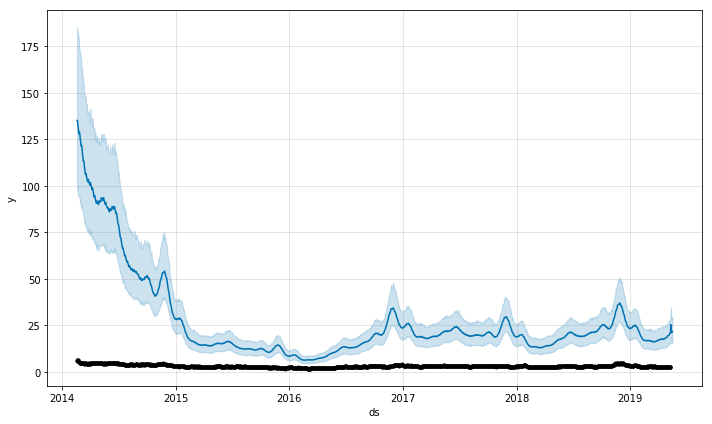

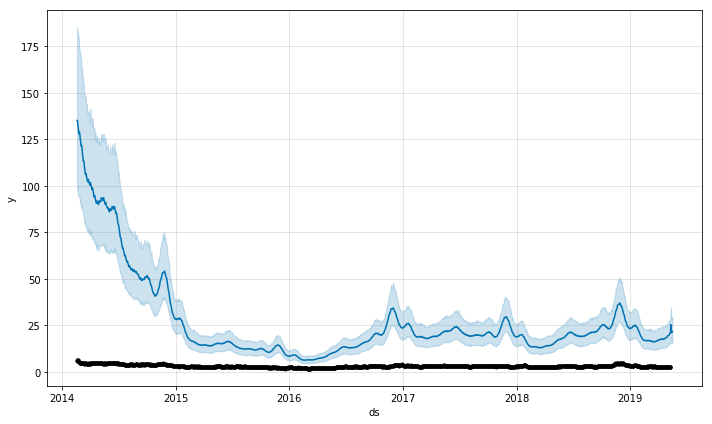

In [41]:
model.plot(forecast_data_orig)

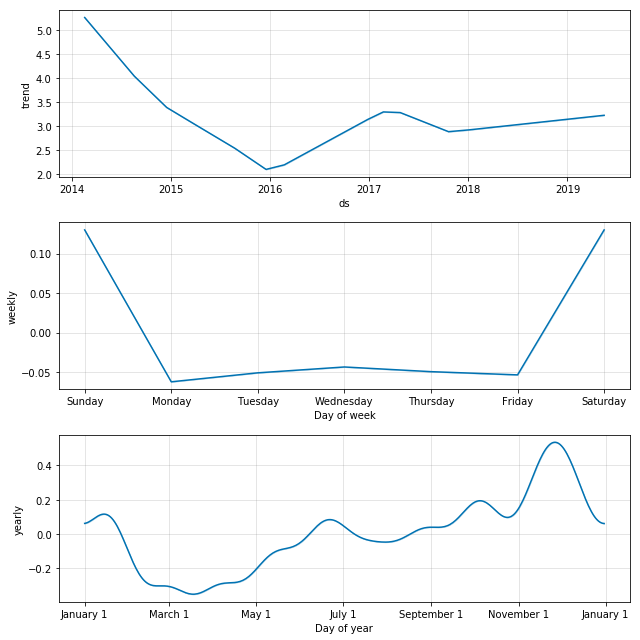

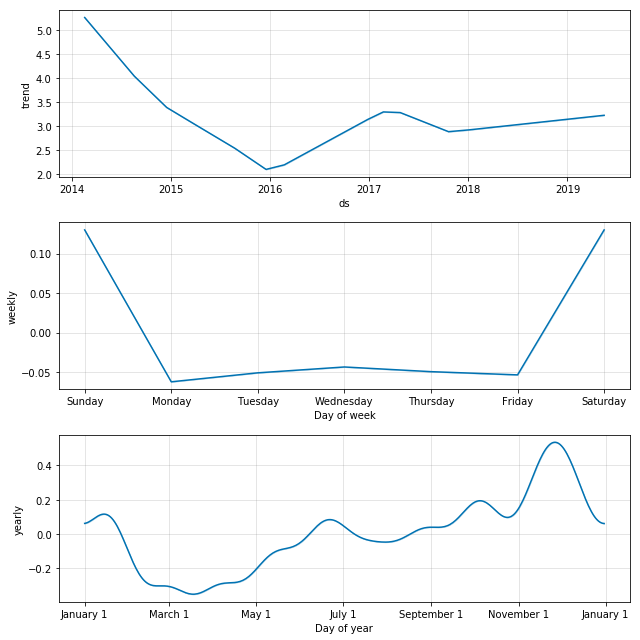

In [53]:
#Plot Seasonality and Trend components of orig
model.plot_components(forecast_data_orig)